<a href="https://colab.research.google.com/github/rediahmds/eco-sort/blob/main/train/train_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare dataset

In [1]:
!pip install kagglehub

### Download

In [41]:
import kagglehub

alistair_ds = kagglehub.dataset_download("alistairking/recyclable-and-household-waste-classification")
print("Path to dataset files:", alistair_ds)

mostafa_ds = kagglehub.dataset_download("mostafaabla/garbage-classification")
print("Path to dataset files:", mostafa_ds)

joe_ds = kagglehub.dataset_download("joebeachcapital/realwaste")
print("Path to dataset files:", joe_ds)

100%|██████████| 657M/657M [00:09<00:00, 71.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/realwaste/versions/1


In [45]:
!ls /root/.cache/kagglehub/datasets/joebeachcapital/realwaste/versions/1/realwaste-main/RealWaste/

 Cardboard	  Glass  'Miscellaneous Trash'	 Plastic	  Vegetation
'Food Organics'   Metal   Paper			'Textile Trash'


Show directory tree

In [47]:
from pathlib import Path

def print_directory_tree(root: Path, prefix: str = ""):
    """
    Mencetak struktur direktori dengan tampilan seperti pohon.
    Hanya menampilkan folder (tanpa file).
    """
    subdirs = sorted([p for p in root.iterdir() if p.is_dir()])
    for i, subdir in enumerate(subdirs):
        connector = "└── " if i == len(subdirs) - 1 else "├── "
        print(f"{prefix}{connector}{subdir.name}")
        extension = "    " if i == len(subdirs) - 1 else "│   "
        print_directory_tree(subdir, prefix + extension)

# Path ke folder utama
alistair_path = Path(alistair_ds) / "images" / "images"
mostafa_path = Path(mostafa_ds) / "garbage_classification"
joe_path = Path(joe_ds) / "realwaste-main" / "RealWaste"

# Cetak pohon direktori
print(alistair_path.name)
print_directory_tree(alistair_path)

print(mostafa_path.name)
print_directory_tree(mostafa_path)

print(joe_path.name)
print_directory_tree(joe_path)


images
├── aerosol_cans
│   ├── default
│   └── real_world
├── aluminum_food_cans
│   ├── default
│   └── real_world
├── aluminum_soda_cans
│   ├── default
│   └── real_world
├── cardboard_boxes
│   ├── default
│   └── real_world
├── cardboard_packaging
│   ├── default
│   └── real_world
├── clothing
│   ├── default
│   └── real_world
├── coffee_grounds
│   ├── default
│   └── real_world
├── disposable_plastic_cutlery
│   ├── default
│   └── real_world
├── eggshells
│   ├── default
│   └── real_world
├── food_waste
│   ├── default
│   └── real_world
├── glass_beverage_bottles
│   ├── default
│   └── real_world
├── glass_cosmetic_containers
│   ├── default
│   └── real_world
├── glass_food_jars
│   ├── default
│   └── real_world
├── magazines
│   ├── default
│   └── real_world
├── newspaper
│   ├── default
│   └── real_world
├── office_paper
│   ├── default
│   └── real_world
├── paper_cups
│   ├── default
│   └── real_world
├── plastic_cup_lids
│   ├── default
│   └── real_world
├── pl

### Copy Dataset

In [21]:
from pathlib import Path
import shutil
import random

def copy_n_files(src_dir, dst_dir, n, randomize=False):
    src_path = Path(src_dir)
    dst_path = Path(dst_dir)

    # Buat folder tujuan jika belum ada
    dst_path.mkdir(parents=True, exist_ok=True)

    # Ambil semua file dari direktori sumber
    all_files = [f for f in src_path.iterdir() if f.is_file()]

    # Pastikan n tidak lebih besar dari jumlah file
    n = min(n, len(all_files))

    # Tentukan file mana yang akan disalin
    if randomize:
        files_to_copy = random.sample(all_files, n)
    else:
        files_to_copy = sorted(all_files)[:n]

    # Copy file satu per satu
    for file in files_to_copy:
        shutil.copy(file, dst_path)
        print(f"Copied: {file.name}")

    print(f"\nTotal {n} files copied from '{src_dir}' to '{dst_dir}' (random: {randomize}).")


#### Customize Alistair Dataset

In [34]:
from pathlib import Path
import shutil
from tqdm import tqdm

source_root = alistair_path
target_root = Path("dataset/train")
target_root.mkdir(parents=True, exist_ok=True)

class_map = {
    "food_waste": "organic",
    "eggshells": "organic",
    "coffee_grounds": "organic",
    "tea_bags": "organic",
    "plastic_soda_bottles": "plastic",
    "plastic_trash_bags": "plastic",
    "plastic_food_containers": "plastic",
    "plastic_shopping_bags": "plastic",
    "plastic_straws": "plastic",
    "plastic_water_bottles": "plastic",
    "plastic_detergent_bottles": "plastic",
    "plastic_cup_lids": "plastic",
    "glass_food_jars": "glass",
    "glass_beverage_bottles": "glass",
    "glass_cosmetic_containers": "glass",
    "aluminum_soda_cans": "metal",
    "aluminum_food_cans": "metal",
    "steel_food_cans": "metal",
    "aerosol_cans": "metal",
    "cardboard_boxes": "paper",
    "cardboard_packaging": "paper",
    "magazines": "paper",
    "newspaper": "paper",
    "office_paper": "paper",
    "paper_cups": "paper",
    "styrofoam_cups": "styrofoam",
    "styrofoam_food_containers": "styrofoam",
    "clothing": "textiles",
    "shoes": "textiles"
}

print("🚀 Memulai pengelompokan dataset dengan penamaan ulang...\n")

for class_name, parent_class in class_map.items():
    for subset in ["default", "real_world"]:
        class_dir = source_root / class_name / subset
        if class_dir.exists():
            img_list = list(class_dir.glob("*.*"))
            print(f"📁 Menyalin {len(img_list)} gambar dari '{class_name}/{subset}' ke '{parent_class}'")
            for i, img in enumerate(tqdm(img_list, desc=f"{class_name}/{subset}", leave=False)):
                dest_dir = target_root / parent_class
                dest_dir.mkdir(parents=True, exist_ok=True)

                # Penamaan ulang
                ext = img.suffix
                new_name = f"{subset}_{class_name}_{i:04d}{ext}"
                shutil.copy(img, dest_dir / new_name)

print("\n✅ Pengelompokan selesai tanpa konflik penamaan.")
print("📂 Dataset tersimpan di:", target_root.resolve())


🚀 Memulai pengelompokan dataset dengan penamaan ulang...

📁 Menyalin 250 gambar dari 'food_waste/default' ke 'organic'


📁 Menyalin 250 gambar dari 'food_waste/real_world' ke 'organic'


📁 Menyalin 250 gambar dari 'eggshells/default' ke 'organic'


📁 Menyalin 250 gambar dari 'eggshells/real_world' ke 'organic'


📁 Menyalin 250 gambar dari 'coffee_grounds/default' ke 'organic'


📁 Menyalin 250 gambar dari 'coffee_grounds/real_world' ke 'organic'


📁 Menyalin 250 gambar dari 'tea_bags/default' ke 'organic'


📁 Menyalin 250 gambar dari 'tea_bags/real_world' ke 'organic'


📁 Menyalin 250 gambar dari 'plastic_soda_bottles/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_soda_bottles/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_trash_bags/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_trash_bags/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_food_containers/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_food_containers/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_shopping_bags/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_shopping_bags/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_straws/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_straws/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_water_bottles/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_water_bottles/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_detergent_bottles/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_detergent_bottles/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_cup_lids/default' ke 'plastic'


📁 Menyalin 250 gambar dari 'plastic_cup_lids/real_world' ke 'plastic'


📁 Menyalin 250 gambar dari 'glass_food_jars/default' ke 'glass'


📁 Menyalin 250 gambar dari 'glass_food_jars/real_world' ke 'glass'


📁 Menyalin 250 gambar dari 'glass_beverage_bottles/default' ke 'glass'


📁 Menyalin 250 gambar dari 'glass_beverage_bottles/real_world' ke 'glass'


📁 Menyalin 250 gambar dari 'glass_cosmetic_containers/default' ke 'glass'


📁 Menyalin 250 gambar dari 'glass_cosmetic_containers/real_world' ke 'glass'


📁 Menyalin 250 gambar dari 'aluminum_soda_cans/default' ke 'metal'


📁 Menyalin 250 gambar dari 'aluminum_soda_cans/real_world' ke 'metal'


📁 Menyalin 250 gambar dari 'aluminum_food_cans/default' ke 'metal'


📁 Menyalin 250 gambar dari 'aluminum_food_cans/real_world' ke 'metal'


📁 Menyalin 250 gambar dari 'steel_food_cans/default' ke 'metal'


📁 Menyalin 250 gambar dari 'steel_food_cans/real_world' ke 'metal'


📁 Menyalin 250 gambar dari 'aerosol_cans/default' ke 'metal'


📁 Menyalin 250 gambar dari 'aerosol_cans/real_world' ke 'metal'


📁 Menyalin 250 gambar dari 'cardboard_boxes/default' ke 'paper'


📁 Menyalin 250 gambar dari 'cardboard_boxes/real_world' ke 'paper'


📁 Menyalin 250 gambar dari 'cardboard_packaging/default' ke 'paper'


📁 Menyalin 250 gambar dari 'cardboard_packaging/real_world' ke 'paper'


📁 Menyalin 250 gambar dari 'magazines/default' ke 'paper'


📁 Menyalin 250 gambar dari 'magazines/real_world' ke 'paper'


📁 Menyalin 250 gambar dari 'newspaper/default' ke 'paper'


📁 Menyalin 250 gambar dari 'newspaper/real_world' ke 'paper'


📁 Menyalin 250 gambar dari 'office_paper/default' ke 'paper'


📁 Menyalin 250 gambar dari 'office_paper/real_world' ke 'paper'


📁 Menyalin 250 gambar dari 'paper_cups/default' ke 'paper'


📁 Menyalin 250 gambar dari 'paper_cups/real_world' ke 'paper'


📁 Menyalin 250 gambar dari 'styrofoam_cups/default' ke 'styrofoam'


📁 Menyalin 250 gambar dari 'styrofoam_cups/real_world' ke 'styrofoam'


📁 Menyalin 250 gambar dari 'styrofoam_food_containers/default' ke 'styrofoam'


📁 Menyalin 250 gambar dari 'styrofoam_food_containers/real_world' ke 'styrofoam'


📁 Menyalin 250 gambar dari 'clothing/default' ke 'textiles'


📁 Menyalin 250 gambar dari 'clothing/real_world' ke 'textiles'


📁 Menyalin 250 gambar dari 'shoes/default' ke 'textiles'


📁 Menyalin 250 gambar dari 'shoes/real_world' ke 'textiles'



✅ Pengelompokan selesai tanpa konflik penamaan.
📂 Dataset tersimpan di: /content/dataset/train


In [48]:
# copy_n_files(f"{mostafa_ds}/garbage_classification/paper", "dataset/train/paper", 500, randomize=True)
# copy_n_files(f"{mostafa_ds}/garbage_classification/cardboard", "dataset/train/paper", 500, randomize=True)

# copy_n_files(f"{mostafa_ds}/garbage_classification/white-glass", "dataset/train/glass", 600, randomize=True)
# copy_n_files(f"{mostafa_ds}/garbage_classification/brown-glass", "dataset/train/glass", 600, randomize=True)
# copy_n_files(f"{mostafa_ds}/garbage_classification/green-glass", "dataset/train/glass", 600, randomize=True)

# copy_n_files(f"{mostafa_ds}/garbage_classification/clothes", "dataset/train/textiles", 1500, randomize=True)
# copy_n_files(f"{mostafa_ds}/garbage_classification/shoes", "dataset/train/textiles", 1500, randomize=True)

# copy_n_files(f"{mostafa_ds}/garbage_classification/metal", "dataset/train/metal", 750, randomize=True)
# copy_n_files(f"{joe_ds}/realwaste-main/RealWaste/Metal", "dataset/train/metal", 750, randomize=True)


Copied: Metal_260.jpg
Copied: Metal_401.jpg
Copied: Metal_43.jpg
Copied: Metal_208.jpg
Copied: Metal_47.jpg
Copied: Metal_489.jpg
Copied: Metal_69.jpg
Copied: Metal_63.jpg
Copied: Metal_481.jpg
Copied: Metal_692.jpg
Copied: Metal_175.jpg
Copied: Metal_441.jpg
Copied: Metal_27.jpg
Copied: Metal_378.jpg
Copied: Metal_686.jpg
Copied: Metal_279.jpg
Copied: Metal_761.jpg
Copied: Metal_215.jpg
Copied: Metal_250.jpg
Copied: Metal_413.jpg
Copied: Metal_254.jpg
Copied: Metal_528.jpg
Copied: Metal_161.jpg
Copied: Metal_645.jpg
Copied: Metal_28.jpg
Copied: Metal_141.jpg
Copied: Metal_308.jpg
Copied: Metal_530.jpg
Copied: Metal_558.jpg
Copied: Metal_30.jpg
Copied: Metal_475.jpg
Copied: Metal_191.jpg
Copied: Metal_134.jpg
Copied: Metal_405.jpg
Copied: Metal_120.jpg
Copied: Metal_242.jpg
Copied: Metal_87.jpg
Copied: Metal_165.jpg
Copied: Metal_79.jpg
Copied: Metal_669.jpg
Copied: Metal_2.jpg
Copied: Metal_615.jpg
Copied: Metal_299.jpg
Copied: Metal_286.jpg
Copied: Metal_765.jpg
Copied: Metal_243.jpg

#### TODO: Check for duplicates

### Create Validation Dataset

This dataset will be created by moving some files from training dataset.

In [51]:
def move_validation_split_custom(train_dir, val_dir, per_class_counts: dict, random_select=True):
    train_dir = Path(train_dir)
    val_dir = Path(val_dir)
    val_dir.mkdir(parents=True, exist_ok=True)

    for class_name, n in per_class_counts.items():
        class_dir = train_dir / class_name
        if not class_dir.exists():
            print(f"⚠️ Folder tidak ditemukan: {class_dir}")
            continue

        images = sorted([p for p in class_dir.glob("*.*") if p.suffix.lower() in {'.jpg', '.jpeg', '.png'}])
        selected = random.sample(images, min(n, len(images))) if random_select else images[:n]
        val_class_dir = val_dir / class_name
        val_class_dir.mkdir(parents=True, exist_ok=True)

        print(f"📁 {class_name}: Memindahkan {len(selected)} file...")
        for img in tqdm(selected, desc=f"  Pindah {class_name}", leave=False):
            shutil.move(str(img), str(val_class_dir / img.name))

    print("\n✅ Selesai membuat validasi set proporsional.")


In [52]:
# 15% validasi per kelas
per_class_counts = {
    "glass": 495,
    "metal": 525,
    "organic": 300,
    "paper": 600,
    "plastic": 600,
    "styrofoam": 150,
    "textiles": 600
}

move_validation_split_custom("dataset/train", "dataset/test", per_class_counts, random_select=True)

📁 glass: Memindahkan 495 file...


📁 metal: Memindahkan 525 file...


📁 organic: Memindahkan 300 file...


📁 paper: Memindahkan 600 file...


📁 plastic: Memindahkan 600 file...


📁 styrofoam: Memindahkan 150 file...


📁 textiles: Memindahkan 600 file...



✅ Selesai membuat validasi set proporsional.


### Data Distribution checking

In [53]:
from collections import Counter
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder("dataset/train")
label_counts = Counter([label for _, label in train_dataset])
print("Label mapping:", train_dataset.class_to_idx)
print("Distribusi kelas:", label_counts)

# test_dataset = ImageFolder("dataset/test")
# label_counts = Counter([label for _, label in test_dataset])
# print("Distribusi kelas:", label_counts)


Label mapping: {'glass': 0, 'metal': 1, 'organic': 2, 'paper': 3, 'plastic': 4, 'styrofoam': 5, 'textiles': 6}
Distribusi kelas: Counter({3: 3400, 4: 3400, 6: 3400, 1: 2975, 0: 2805, 2: 1700, 5: 850})


## Training and Evaluation

In [50]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

### Training Options

#### (1) Training with early stopping - Recommended

Label mapping: {'non_organic': 0, 'organic': 1}
Train distribusi: Counter({0: 1000, 1: 1000})
Val distribusi: Counter({0: 200, 1: 200})


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20 - Train Acc: 0.8000 - Val Acc: 0.8450
📦 Best model disimpan.
Epoch 2/20 - Train Acc: 0.8450 - Val Acc: 0.8675
📦 Best model disimpan.
Epoch 3/20 - Train Acc: 0.8645 - Val Acc: 0.8700
📦 Best model disimpan.
Epoch 4/20 - Train Acc: 0.8890 - Val Acc: 0.8425
Epoch 5/20 - Train Acc: 0.8995 - Val Acc: 0.8800
📦 Best model disimpan.
Epoch 6/20 - Train Acc: 0.8945 - Val Acc: 0.8625
Epoch 7/20 - Train Acc: 0.8940 - Val Acc: 0.8675
Epoch 8/20 - Train Acc: 0.9075 - Val Acc: 0.8625
Epoch 9/20 - Train Acc: 0.9195 - Val Acc: 0.8925
📦 Best model disimpan.
Epoch 10/20 - Train Acc: 0.9425 - Val Acc: 0.8250
Epoch 11/20 - Train Acc: 0.9280 - Val Acc: 0.8250
Epoch 12/20 - Train Acc: 0.9305 - Val Acc: 0.9000
📦 Best model disimpan.
Epoch 13/20 - Train Acc: 0.9425 - Val Acc: 0.8975
Epoch 14/20 - Train Acc: 0.9480 - Val Acc: 0.8900
Epoch 15/20 - Train Acc: 0.9510 - Val Acc: 0.8625
Epoch 16/20 - Train Acc: 0.9610 - Val Acc: 0.8650
Epoch 17/20 - Train Acc: 0.9600 - Val Acc: 0.8800
Epoch 18/20 - Train A

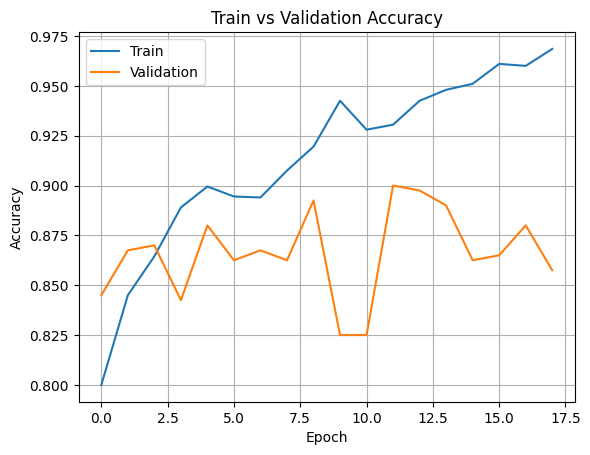

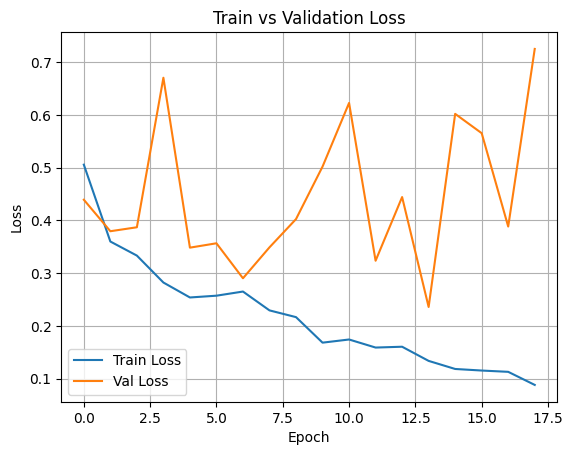

=== Classification Report ===
              precision    recall  f1-score   support

 non_organic       0.93      0.78      0.84       200
     organic       0.81      0.94      0.87       200

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



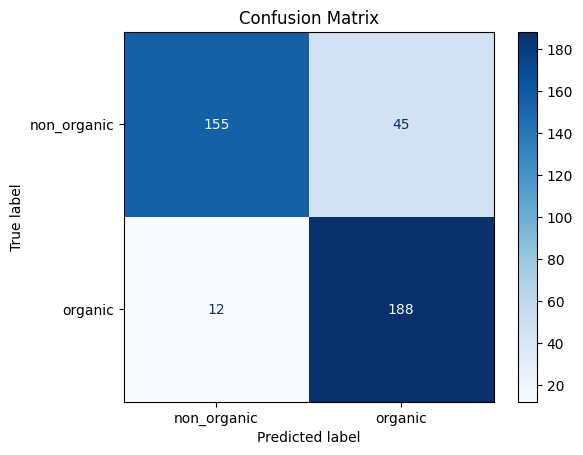

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# 🔁 Transformasi
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# 📁 Load dataset
train_dataset = datasets.ImageFolder("dataset/train", transform=transform)
val_dataset = datasets.ImageFolder("dataset/test", transform=transform)
class_names = train_dataset.classes
print("Label mapping:", train_dataset.class_to_idx)
print("Train distribusi:", Counter([label for _, label in train_dataset]))
print("Val distribusi:", Counter([label for _, label in val_dataset]))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# ⚙️ Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)

# 🎯 Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 🔁 Training loop
epochs = 20
patience = 6
train_accs, val_accs = [], []
train_losses, val_losses = [], []
best_val_acc = 0
early_stop_counter = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels)
        total += labels.size(0)

    train_acc = correct / total
    train_accs.append(train_acc.item())
    train_losses.append(train_loss / len(train_loader))

    # 🔍 Validasi
    model.eval()
    val_loss = 0
    correct, total = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels)
            total += labels.size(0)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    val_acc = correct / total
    val_accs.append(val_acc.item())
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.4f} - Val Acc: {val_acc:.4f}")

    # 💾 Simpan model terbaik
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print("📦 Best model disimpan.")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("⏹️ Early stopping triggered.")
            break

# 📊 Grafik Accuracy
plt.plot(train_accs, label="Train")
plt.plot(val_accs, label="Validation")
plt.title("Train vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 📉 Grafik Loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Train vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 📑 Classification Report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# 🔷 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


#### (2) Training without early stopping

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import time

# Transform
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Dataset
train_dataset = datasets.ImageFolder("dataset/train", transform=transform)
class_names = train_dataset.classes
print("Label mapping:", train_dataset.class_to_idx)
print("Distribusi:", Counter([label for _, label in train_dataset]))

val_dataset = datasets.ImageFolder("dataset/test", transform=transform)
print("Label mapping:", val_dataset.class_to_idx)
print("Distribusi:", Counter([label for _, label in val_dataset]))

# Split
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 6
train_accs, val_accs = [], []
best_val_acc = 0

for epoch in range(epochs):
    model.train()
    correct, total, loss_total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        loss_total += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += torch.sum(preds == labels)
        total += labels.size(0)

    train_acc = correct / total
    train_accs.append(train_acc.item())
    print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.4f}")

    # Validasi
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += torch.sum(preds == labels)
            total += labels.size(0)

    val_acc = correct / total
    val_accs.append(val_acc.item())
    print(f"            → Val Acc: {val_acc:.4f}")

# Simpan
torch.save(model.state_dict(), "model_cnn.pt")
print("✅ Model disimpan.")

Label mapping: {'non_organic': 0, 'organic': 1}
Distribusi: Counter({0: 1000, 1: 1000})
Label mapping: {'non_organic': 0, 'organic': 1}
Distribusi: Counter({0: 200, 1: 200})


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/6 - Train Acc: 0.7750
            → Val Acc: 0.8850
Epoch 2/6 - Train Acc: 0.8655
            → Val Acc: 0.8750
Epoch 3/6 - Train Acc: 0.8725
            → Val Acc: 0.8950
Epoch 4/6 - Train Acc: 0.8720
            → Val Acc: 0.8600
Epoch 5/6 - Train Acc: 0.8730
            → Val Acc: 0.8975
Epoch 6/6 - Train Acc: 0.8915
            → Val Acc: 0.9175
✅ Model disimpan.


### Evaluation


=== Classification Report ===
              precision    recall  f1-score   support

 non_organic       0.94      0.89      0.92       200
     organic       0.90      0.94      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



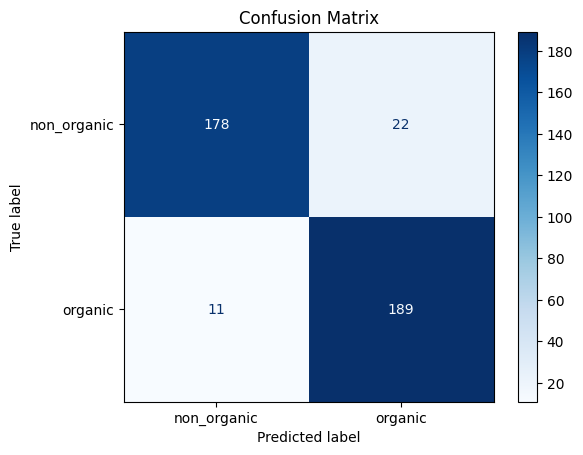

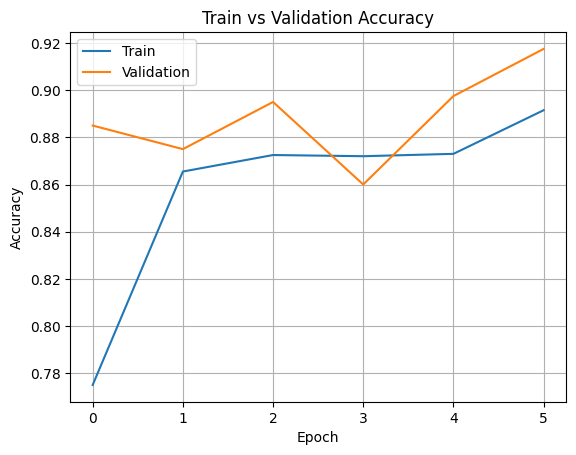

In [ ]:
# 📊 Evaluasi dengan laporan & Confusion Matrix
model.eval()
y_true, y_pred = [], []

for images, labels in val_loader:
    images = images.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    y_true.extend(labels.numpy())
    y_pred.extend(preds.cpu().numpy())

print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Plot akurasi training & val
plt.plot(train_accs, label="Train")
plt.plot(val_accs, label="Validation")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Train vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()